In [2]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = 'DATASET.xlsx'
num_columns_to_read = len(pd.read_excel(file_path, nrows=1).columns)
df = pd.read_excel(file_path, usecols=range(num_columns_to_read))


# cleaning data
df['cleaned_text'] = df['Initial Prompt'].replace(r'<[^>]+>', '', regex=True) #html cleaning
df['cleaned_text'] = df['cleaned_text'].replace(r'http\S+', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].replace(r'[^A-Za-z0-9\s]', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.lower()

# preprocessing
df = df.dropna(how='any', subset=['Yes/No (Resolved or not)'])
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].replace(['No '], 'No')
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].replace(['Yes`', ' Yes'], 'Yes')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

df['cleaned_text'] = df['cleaned_text'].apply(process_text)

# Display the first few rows of the processed data
df.head()

,Initial Prompt,Yes/No (Resolved or not),NumberOfPrompts,L/H (Low or High),Programming Language,which type of technology (DL/ML/WEB/None),cleaned_text
0,How to add a java class in a generic container...,Yes,3.0,L,Java,None,add java class generic container testcontainer...
1,How to run a java class inside of a container ...,Yes,2.0,L,Java,None,run java class inside container testcontainers
2,"I have a github repo on python, how to make it...",Yes,1.0,L,Python,None,github repo python make installable pip instal...
3,I'm using Terraform to manage some infrastruct...,Yes,2.0,L,HCL,None,im using terraform manage infrastructure gcp u...
4,I have a challenge for you. I'm working in a r...,No,8.0,H,TypeScript,WEB,challenge im working reacttypescript applicati...


In [4]:
df['Yes/No (Resolved or not)'].value_counts()

Yes    419
No     100
Name: Yes/No (Resolved or not), dtype: int64

The most repeated word is 'nn' with a count of 147.


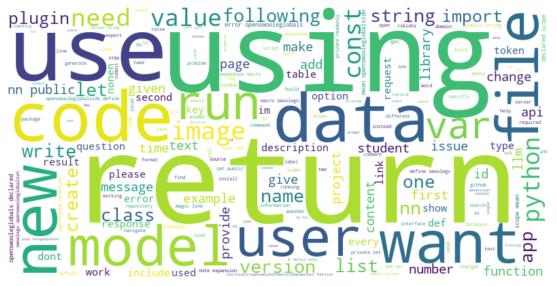

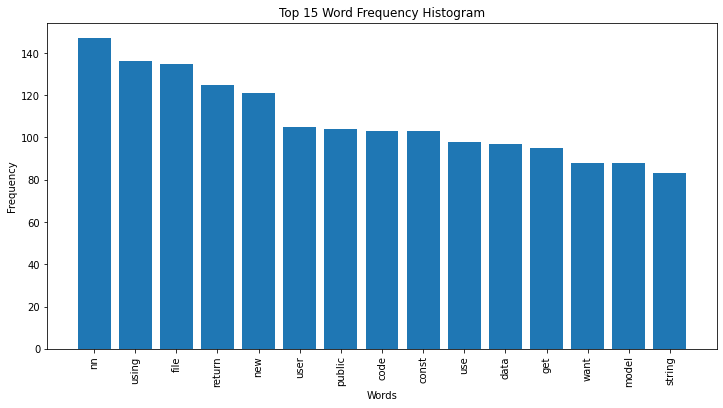

In [5]:
def find_most_repeated_word(text):
    words = text.split()
    word_counts = Counter(words)
    most_repeated_word, count = word_counts.most_common(1)[0]
    return most_repeated_word, count

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def generate_histogram(text, top_n=15):
    words = text.split()
    word_counts = Counter(words)
    top_words, top_counts = zip(*word_counts.most_common(top_n))
    plt.figure(figsize=(12, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Word Frequency Histogram')
    plt.xticks(rotation=90)
    plt.show()


input_text = " ".join(df['cleaned_text'])

most_repeated_word, count = find_most_repeated_word(input_text)
print(f"The most repeated word is '{most_repeated_word}' with a count of {count}.")

generate_word_cloud(input_text)
generate_histogram(input_text)

In [6]:
# # Ensuring a proportional representation of both 'Yes' and 'No'
# df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].astype('category')
# train_df, test_df = train_test_split(df, train_size=0.8, stratify=df['Yes/No (Resolved or not)'])

In [7]:
train_df, test_df = train_test_split(df, train_size=0.8, stratify=df['Yes/No (Resolved or not)'])

In [62]:
import numpy as np

def calculate_tf_idf(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_matrix

def create_bag_of_words(corpus):
    count_vectorizer = CountVectorizer()
    bag_of_words = count_vectorizer.fit_transform(corpus)
    return bag_of_words

def train_word2vec_model(sentences, vector_size=100, window=5, min_count=1, sg=0):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=sg)
    return model

def get_vector(word):
    try:
        return word2vec_model.wv[word]
    except KeyError:
        return np.zeros((word2vec_model.vector_size,))
    
def get_index(word):
    try:
        return word2vec_model.wv.key_to_index[word]
    except KeyError:
        # Return -1 or any suitable value to indicate that the word is not in the vocabulary
        return -1

def get_vectors_from_indices(indices):
    vectors = []
    for index in indices:
        try:
            word = word2vec_model.wv.index_to_key[index]
            vector = word2vec_model.wv[word]
            vectors.append(vector)
        except KeyError:
            # Handle the case where the index doesn't correspond to a valid word
            vectors.append(np.zeros((word2vec_model.vector_size,)))  # You can use zeros or any other suitable placeholder

    return np.array(vectors)


word2vec_model = train_word2vec_model([t.split() for t in df['cleaned_text']])

In [44]:
word2vec_model.wv['file']

array([-4.01354302e-03,  1.16112698e-02, -2.31354986e-03, -5.56417741e-04,
        1.24564283e-02, -1.26757259e-02,  1.49304536e-03,  2.86596697e-02,
       -1.75876096e-02, -1.83141232e-03, -1.30319642e-02, -2.18380913e-02,
        8.55464209e-03,  7.06552481e-03,  1.35224480e-02, -1.62735246e-02,
        7.46805966e-03, -3.89611721e-03, -7.91999791e-03, -2.94074994e-02,
       -2.25316314e-03,  3.05917492e-04,  5.92722511e-03, -1.45331090e-02,
        5.64364111e-03, -1.12968008e-03,  1.71040441e-03,  7.15136295e-04,
       -1.67407002e-02,  4.86497907e-03,  2.00281180e-02, -7.29291094e-03,
       -5.78629784e-03, -9.33416747e-03, -1.28710773e-02,  1.37735344e-02,
       -8.13527615e-04, -7.40232319e-03, -4.45944676e-03, -2.03413274e-02,
       -6.26798440e-03, -8.00884143e-03, -4.57873382e-03,  8.64025578e-03,
        1.49830263e-02, -3.30938725e-03, -1.37814395e-02, -4.75166412e-03,
        1.53295160e-03,  1.00775566e-02,  8.90894048e-03, -1.17433080e-02,
       -1.49536701e-02, -

In [89]:
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit(df['Yes/No (Resolved or not)'])

train_x = [np.array([get_index(word) for word in sentence.split()]) for sentence in train_df['cleaned_text']]
train_y = label_encoder.transform(train_df['Yes/No (Resolved or not)'])
test_x = [np.array([get_vector(word) for word in sentence.split()]) for sentence in test_df['cleaned_text']]
test_y = label_encoder.transform(test_df['Yes/No (Resolved or not)'])

In [50]:
train_x[0]

array([189,  64,  76,  46,   1, 104])

In [66]:
# Padding sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sequence_length = max(len(seq) for seq in train_x)
X = pad_sequences(train_x, maxlen=max_sequence_length, padding='post')

In [55]:
print(X.shape)
from collections import Counter
print(Counter(train_y))

(415, 926)
Counter({1: 335, 0: 80})


In [68]:
from imblearn.over_sampling import SMOTE

# SMOTE resampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, train_y_resampled = smote.fit_resample(X, train_y)
print('sampled df shape:', X_resampled.shape)
print(Counter(train_y_resampled))

sampled df shape: (670, 926)
Counter({1: 335, 0: 335})


In [82]:
X_resampled = np.stack([get_vectors_from_indices(x) for x in X_resampled])

In [83]:
X_resampled.shape

(670, 926, 100)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(max_sequence_length, word2vec_model.vector_size)))
model.add(Dense(1, activation='sigmoid'))  # Adjust based on your task

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Adjust based on your task

model.fit(X_resampled, train_y_resampled, epochs=25, batch_size=32)

Epoch 1/25
21/21 [==============================] - 10s 370ms/step - loss: 0.6936 - accuracy: 0.4987
Epoch 2/25
21/21 [==============================] - 8s 391ms/step - loss: 0.6934 - accuracy: 0.4627
Epoch 3/25
21/21 [==============================] - 7s 321ms/step - loss: 0.6934 - accuracy: 0.5001
Epoch 4/25
21/21 [==============================] - 8s 400ms/step - loss: 0.6934 - accuracy: 0.4617
Epoch 5/25
21/21 [==============================] - 8s 406ms/step - loss: 0.6932 - accuracy: 0.5191
Epoch 6/25
21/21 [==============================] - 7s 346ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 7/25
19/21 [==========================>...] - ETA: 0s - loss: 0.6931 - accuracy: 0.5048

KeyboardInterrupt: 

In [87]:
from sklearn.metrics import accuracy_score, classification_report

print("training accuracy")
predictions = model.predict(X_resampled)
predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]  # Adjust based on your task

# Evaluate the model
accuracy = accuracy_score(train_y_resampled, predicted_classes)
print(f"Accuracy: {accuracy}")
print(classification_report(train_y_resampled, predicted_classes))

training accuracy
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       335
           1       0.50      1.00      0.67       335

    accuracy                           0.50       670
   macro avg       0.25      0.50      0.33       670
weighted avg       0.25      0.50      0.33       670



c:\Users\manoh\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manoh\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manoh\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
X_test = pad_sequences(test_x, maxlen=max_sequence_length, padding='post', dtype='float32')
predictions = model.predict(X_test)
predicted_classes = [1 if prob > 0.5 else 0 for prob in predictions]  # Adjust based on your task

# Evaluate the model
accuracy = accuracy_score(test_y, predicted_classes)
print(f"Accuracy: {accuracy}")
print(classification_report(test_y, predicted_classes))

Accuracy: 0.19230769230769232
              precision    recall  f1-score   support

           0       0.19      1.00      0.32        20
           1       0.00      0.00      0.00        84

    accuracy                           0.19       104
   macro avg       0.10      0.50      0.16       104
weighted avg       0.04      0.19      0.06       104



c:\Users\manoh\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manoh\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manoh\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
